In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import random 

import matplotlib.pyplot as plt
from matplotlib import style
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [104]:
Data = pd.read_csv('C:/Stars.csv')

In [105]:
X = Data.iloc[:, :-1]
y = Data.iloc[:, -1]
y=y.astype('int') #changing data type for y

In [106]:
Data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


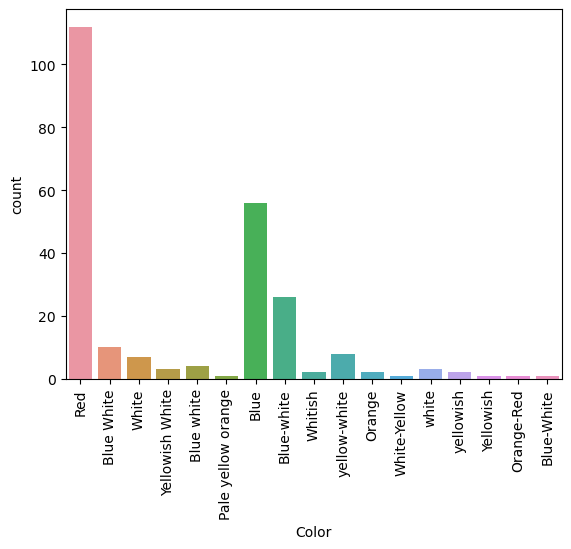

In [107]:
# This plot provides a quick overview of the frequency of each 'Color' category in the dataset.


sns.countplot(x = 'Color',data = Data)
plt.xticks(rotation=90)
plt.show()

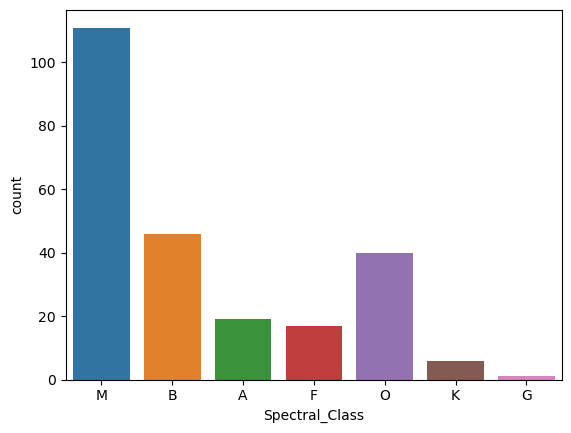

In [108]:
# This plot provides an overview of the frequency of each 'Spectral_Class' category in the dataset.

sns.countplot(x='Spectral_Class', data = Data)
plt.show()

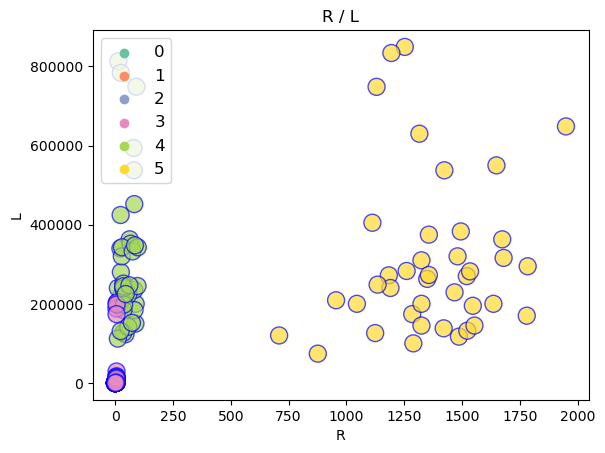

In [109]:
 """ 
 This section of code generates a scatter plot to visually analyze the relationship
 between the radius ('R') and luminosity ('L') of stars.
 
 Each data point on the plot corresponds to an individual star, and its color represents
 the star's 'Type'. A legend is included to elucidate the color-code associated with each star type.
  """
sns.scatterplot(
    x='R', y='L', data = Data, hue = 'Type',
    edgecolor = 'b', s = 150, alpha = 0.7   ,palette = 'Set2'
)

plt.title('R / L')
plt.xlabel('R')
plt.ylabel('L')
plt.legend(loc = 'upper left', fontsize = 12);

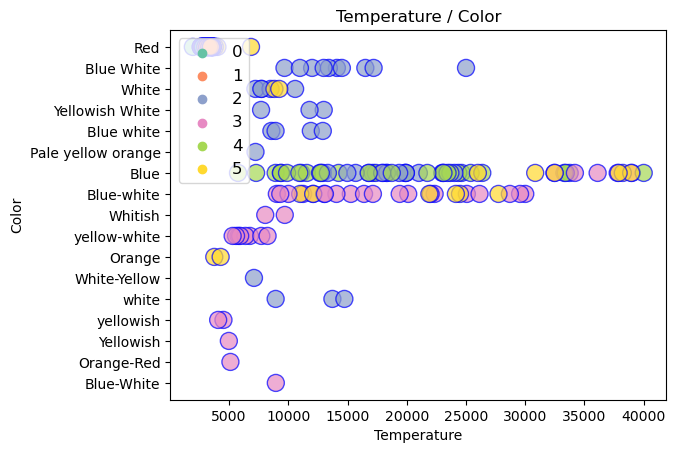

In [110]:
"""
 Here is visualized the relationship between 'Temperature' and 'Color' of stars.

 Each point on the plot represents a star, and the color of the point indicates its 'Type'.
 The legend provides information on the mapping of 'Type' to colors.
"""

sns.scatterplot(
    x='Temperature', y='Color', data = Data, hue = 'Type',
    edgecolor = 'b', s = 150, alpha = 0.7   ,palette = 'Set2'
)

plt.title('Temperature / Color')
plt.xlabel('Temperature')
plt.ylabel('Color')
plt.legend(loc = 'upper left', fontsize = 12);

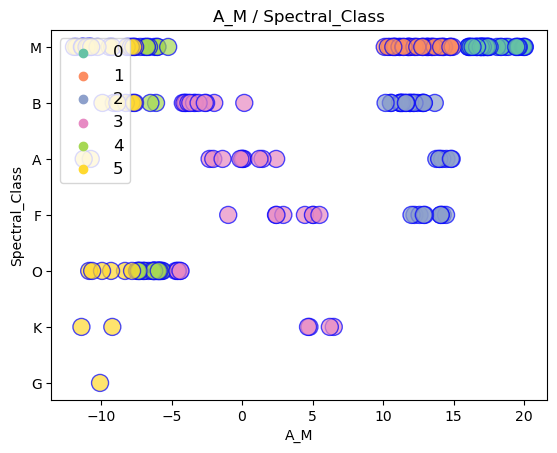

In [111]:
""" 
Here we have visualized the relationship between 'A_M' (Absolute Magnitude)
and 'Spectral_Class' of stars.

Each point on the plot represents a star, and the color of the point indicates its 'Type'.
The legend provides information on the mapping of 'Type' to colors.
"""

sns.scatterplot(
    x='A_M', y='Spectral_Class', data = Data, hue = 'Type',
    edgecolor = 'b', s = 150, alpha = 0.7   ,palette = 'Set2'
)

plt.title('A_M / Spectral_Class')
plt.xlabel('A_M')
plt.ylabel('Spectral_Class')
plt.legend(loc = 'upper left', fontsize = 12);

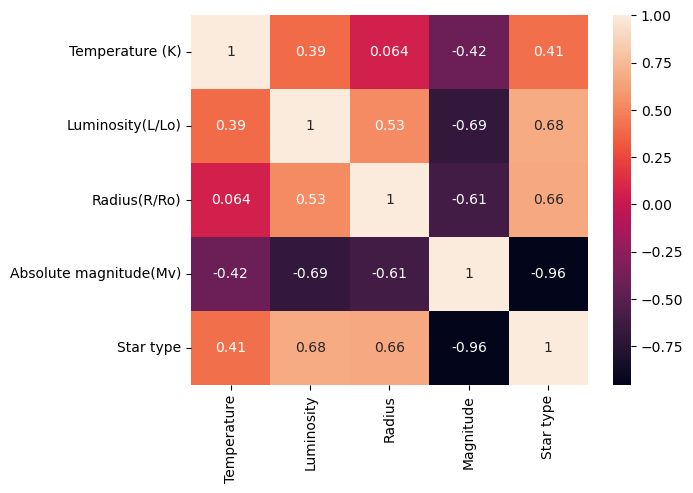

In [112]:
"""
This section calculates the correlation matrix for key astronomical features: 
'Temperature', 'Luminosity', 'Radius', 'Absolute Magnitude', and 'Star Type'.
The correlation matrix quantifies the linear relationships between these variables.
"""

corr_matrix = np.corrcoef([Data['Temperature'], Data['L'], 
                          Data['R'], Data['A_M'], Data['Type']])
sns.heatmap(corr_matrix, annot=True, 
            xticklabels=['Temperature', 'Luminosity', 'Radius', 
                         'Magnitude', 'Star type'], 
            yticklabels=['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 
                         'Absolute magnitude(Mv)', 'Star type'])

plt.show()

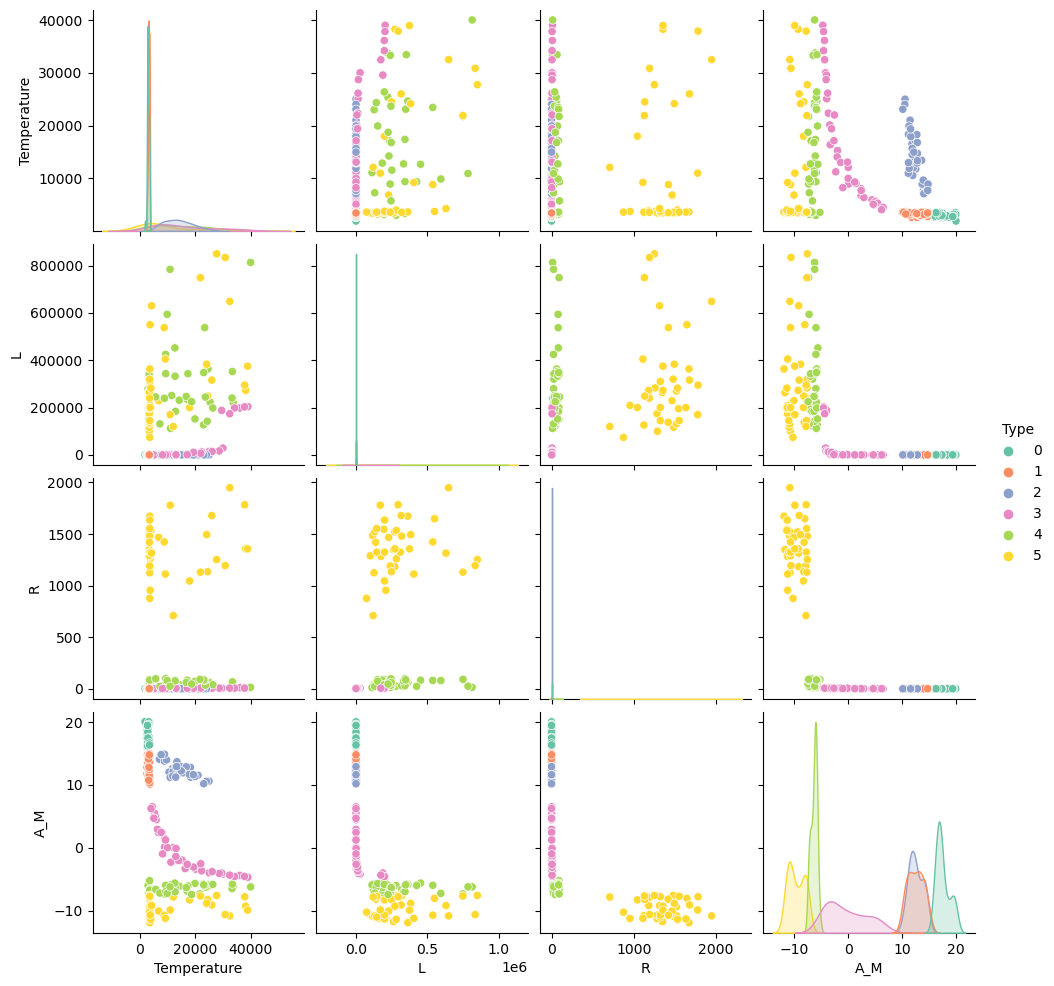

In [113]:
"""
This line of code generates a pair plot
"""
sns.pairplot(data = Data, hue = 'Type', palette = 'Set2');

In [114]:
def processing(Data):
    color_mapped = {'Blue White': 3, 'Blue white': 3, 'Blue-White': 3, 'Blue-white': 3,
                    'white': 5, 'Whitish': 5, 'White': 5,
                    'Yellowish White': 4, 'yellowish': 4, 'Yellowish': 4, 'White-Yellow': 4, 'yellow-white': 4,
                    'Pale yellow orange': 6, 'Orange-Red': 6, 'Orange': 6,
                    'Red': 1,
                    'Blue': 2}

    Data['Color'] = Data['Color'].map(color_mapped)

    spectral_class_mapped = {'M': 1, 'B': 2, 'O': 3, 'A': 4, 'F': 5, 'K': 6, 'K': 7, 'G': 8}

    Data['Spectral_Class'] = Data['Spectral_Class'].map(spectral_class_mapped)

    numerical = Data[['Temperature', 'L', 'R', 'A_M']]
    categorical = Data[['Color', 'Spectral_Class']]

    scaler = MinMaxScaler()
    standardized_numerical = pd.DataFrame(scaler.fit_transform(numerical),
                                          columns=numerical.columns, index=numerical.index)
    standardized_Data = pd.concat([standardized_numerical, categorical], axis=1)
    return standardized_Data

In [115]:
X

,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,Red,M
1,3042,0.000500,0.1542,16.60,Red,M
2,2600,0.000300,0.1020,18.70,Red,M
3,2800,0.000200,0.1600,16.65,Red,M
4,1939,0.000138,0.1030,20.06,Red,M
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Blue,O
237,8829,537493.000000,1423.0000,-10.73,White,A
238,9235,404940.000000,1112.0000,-11.23,White,A


In [116]:
X = processing(X)

In [117]:
X.isna().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
dtype: int64

Text(0, 0.5, 'Accuracy')

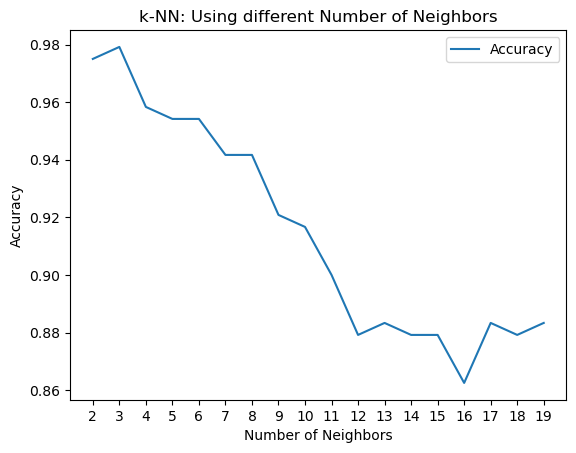

In [118]:
for i, k in enumerate(neighbors):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    accuracy[i] = knn.score(X, y)

plt.title('k-NN: Using different Number of Neighbors')
plt.plot(neighbors, accuracy, label='Accuracy')
plt.xticks(range(2,20))
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

In [121]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)
pred = knn.predict(X)

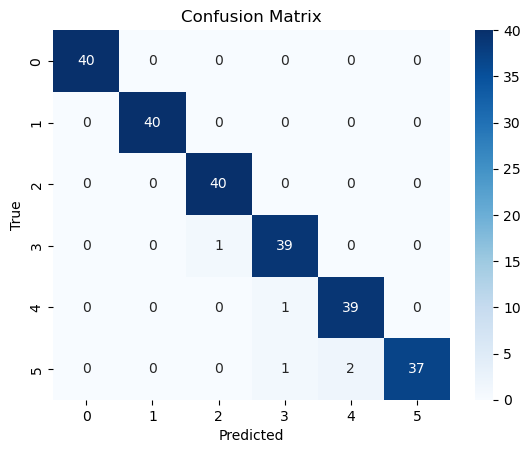

In [123]:
"""
In this segment, we are evaluating the performance of our classification model.
We've obtained predictions ('pred') and now want to see how accurate they are.

To get a clear picture, I'm using a confusion matrix. It breaks down my predictions
into categories like true positives, true negatives, false positives, and false negatives.
"""

cm = confusion_matrix(y,pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()